# Car Insurance Customer Segmentation Analysis

## 1. Problem Statement

___

This project aims to perform the K-means clustering and define optimal number of clusters of health insurance customers who are also interested in car insurance. First, I will create so-called 'business cluster' which will cover the trends from four business related variables: Annual Premium, Policy Sales Channel, Vintage and Region Code. Then, I will create 'demographic cluster' which will group customers based on common demographic characteristics such as Age, Gender, Region Code, Driving License and Vehicle Age. The project also aims to derive insights from the data that can be used to inform business decisions. 

## 2. Data Import and Check
___

### Libraries needed

In [1]:
# libraries for visualizations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# libraries for clustering and PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### Data Import

In [3]:
train_df = pd.read_csv("car_train_df.csv")
train_df.shape

(370789, 12)

In [4]:
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group,Vehicle_Age_num
0,1.0,44,1.0,28.0,0.0,1.0,40454,24.0,217,1,2.0,2.0
1,1.0,76,1.0,3.0,0.0,0.0,33536,24.0,183,0,5.0,1.0
2,1.0,47,1.0,28.0,0.0,1.0,38294,24.0,27,1,2.0,2.0
3,1.0,21,1.0,11.0,1.0,0.0,28619,145.0,203,0,0.0,0.0
4,0.0,29,1.0,41.0,1.0,0.0,27496,145.0,39,0,0.0,0.0


In [5]:
train_df.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group,Vehicle_Age_num
count,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000
mean,0.540251,38.670344,0.997942,26.437281,0.459666,0.503146,29264.643973,107.325177,154.345442,0.121781,1.379814,0.604851
std,0.498378,15.440166,0.045316,13.310391,0.498371,0.499991,14743.056656,51.965201,83.670478,0.327033,1.492576,0.565754
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,24102.000000,28.000000,82.000000,0.000000,0.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,31319.000000,144.000000,154.000000,0.000000,1.000000,1.000000
75%,1.000000,49.000000,1.000000,36.000000,1.000000,1.000000,38596.000000,145.000000,227.000000,0.000000,2.000000,1.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,1.000000,61892.000000,154.000000,299.000000,1.000000,6.000000,2.000000


## 3. Data Pre-processing
___

The data manipulation and cleaning process has been done in my previous project, Car Insurance Sales Prediction.

### Subset the Interested Customers

In [6]:
# subset data set of customers interested
customer_df = train_df[train_df['Response']==1].copy()
customer_df = customer_df.drop(columns = ['Response'])

### Standardization

In [7]:
# Standardization
sc = preprocessing.StandardScaler()
df_std = sc.fit_transform(customer_df)
df_std = pd.DataFrame(data = df_std, columns = customer_df.columns)

## 4. Business Cluster Analysis
___

### Subset Business Data

In [8]:
business = ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
business_df = customer_df[business]
business_std = df_std[business]
business_std.head()

,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
0,0.102859,0.671918,-1.193396,0.752312
1,0.102859,0.533091,-1.193396,-1.515807
2,0.102859,0.130556,-1.193396,-0.978621
3,0.691056,1.129662,0.568628,-1.288995
4,-1.745763,-1.759100,1.125057,-0.083311


### Principal Component Analysis
I will choose reasonable components in order to obtain a better clustering solution than with the standard K-Means so that we can see a nice and clear plot for our segmented groups.

In [9]:
# principal component analysis
pca = PCA()
pca.fit(business_std) 

# explained variance of each component
pca.explained_variance_ratio_

array([0.30551573, 0.25045271, 0.24885113, 0.19518043])

We observe that the first component explains around 31% of the variability of the data. The second one explains 25% and so on.

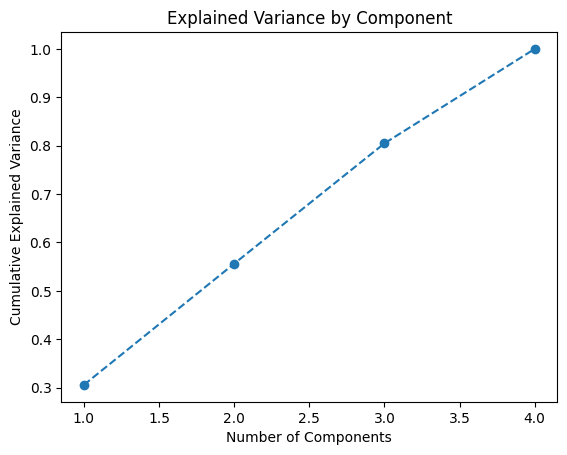

In [10]:
# explained variance by principal component
plt.plot(range(1, 5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

80% of the variance of the data is explained by 3 components. Let's keep the first 3 components for our further analysis.

In [11]:
pca = PCA(n_components = 3)
pca.fit(business_std)

PCA(n_components=3)

### Correlation Heatmap of Components vs Original Features

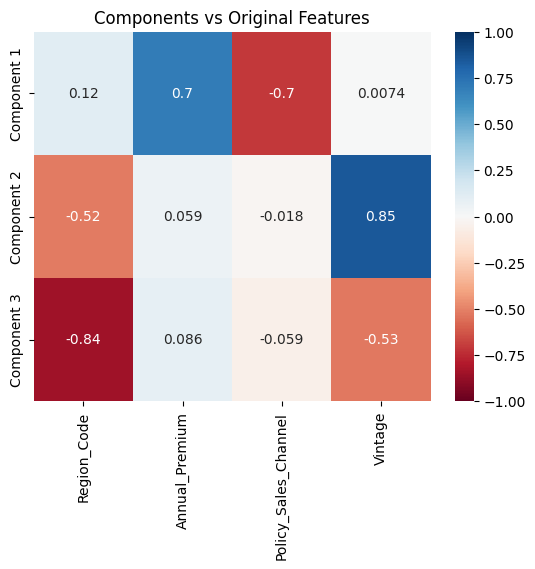

In [12]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = business_std.columns,
                          index = ['Component 1', 'Component 2', 'Component 3'])
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax= 1,
           cmap = 'RdBu',
           annot = True)
plt.title('Components vs Original Features')
plt.show()

We reduced our features to three components from the original four values that explain the shape the values themselves show the so-called loadings. Loadings are correlations between an original variable and the component.

* We see that the first component has high positive correlation with Annual Premium and negative correlation with Policy Sales Channel. This component shows a pattern where customers who pay higher annual premiums tend to prefer certain channels  for policy sales. Higher value of the first component represents higher annual premium and preference for lower Policy Sales Channel code.

* For the second component, Vintage is the most important feature. We see moderate negative correlation with Region Code as well. This component captures the relationship between customer longevity with the company and their association with specific geographic regions. It indicates that long-standing customers tend to be concentrated in particular regions.

* For the final component, we see strong negative correlation with Region Code. The final component could represent the relationship between customers from specific geographic regions (lower region codes) and those who have been associated with the company for a shorter period of time.

In [13]:
scores_pca = pca.transform(business_std)

### Within Clusters Sum of Squares

In [14]:
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_init = 10)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

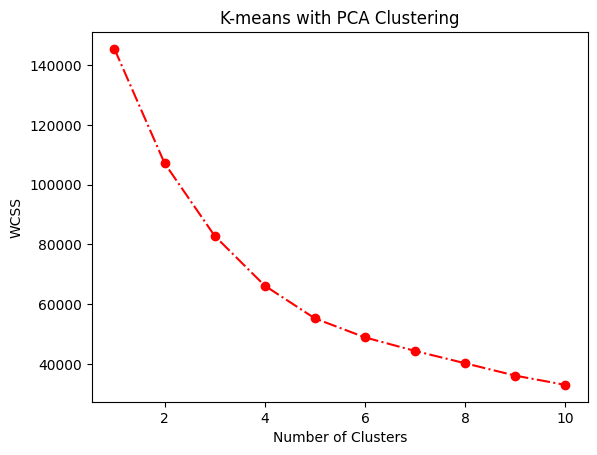

In [15]:
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.', color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

Looking at the plot of within sum of squares, we see that optimal cluster number by within sum of square is 4.

### K-Means Clustering with 4 Clusters

In [16]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0, n_init = 10).fit(scores_pca)
label_pca = kmeans_pca.predict(scores_pca)

In [17]:
df_pca_kmeans = pd.concat([business_df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Component_1', 'Component_2', 'Component_3']
df_pca_kmeans['Segment_Kmeans_PCA'] = kmeans_pca.labels_

### Segment Profiling

In [18]:
pca_kmeans_analysis = df_pca_kmeans.groupby(['Segment_Kmeans_PCA']).mean()
pca_kmeans_analysis['Total_Revenue'] = df_pca_kmeans[['Annual_Premium', 'Segment_Kmeans_PCA']].groupby(['Segment_Kmeans_PCA']).sum()
pca_kmeans_analysis['No. Obs'] = df_pca_kmeans[['Segment_Kmeans_PCA', 'Region_Code']].groupby(['Segment_Kmeans_PCA']).count()
pca_kmeans_analysis['Prop Obs'] = pca_kmeans_analysis['No. Obs']/pca_kmeans_analysis['No. Obs'].sum()
pca_kmeans_analysis

,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Component_1,Component_2,Component_3,Total_Revenue,No. Obs,Prop Obs
Segment_Kmeans_PCA,,,,,,,,,,
0,9.488866,22335.320018,117.956612,153.942264,-0.900502,0.719843,1.151221,194585308,8712,0.192935
1,28.199768,38522.833195,56.878280,76.531136,0.801693,-0.805387,0.467202,463969003,12044,0.266726
2,36.121287,18587.199210,125.179873,149.650045,-0.904095,-0.510527,-0.738980,225890232,12153,0.269140
3,28.399396,38395.489548,61.661277,234.471419,0.749392,0.786643,-0.545125,470191165,12246,0.271199


Based on the values of variables and component scores, I will label each of the four segments as 'Middle-range insurer', 'Premium short-term insurer', 'Thrifty insurer' and 'Premium long-term insurer'.

__0. Middle-range insurer__
* This segement of customers pays the middle range price of average annual premium (22335 dollars) compared to other clusters. We see that this segment is from lower region code (9) compared to other groups on average.

__1. Premium short-term insurer__
* This is the segment that pays the highest price of average annual premium (38522 dollars), but have been associated with the company for the shortest period of time (77 days on average). 
* They prefer the lowest Policy Sales Channel code of 56 on average.

__2. Thrifty insurer__ 
* This is a segment of customers that pay low range price of average annual premium (18587 dollars).
* They prefer the highest Policy Sales Channel code of 125 on average.

__3. Premium long-term insurer__
* This is the segment that pays the high range price of average annual premium (38395 dollars), and have been associated with the company for the longest period of time (234 days on average). 
* They prefer the low Policy Sales Channel code of 61 on average.

### Segment Analysis

In [19]:
pca_kmeans_analysis.rename({0: 'Middle-range insurer',
                           1: 'Premium short-term insurer',
                           2: 'Thrifty insurer',
                           3: 'Premium long-term insurer'})

,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Component_1,Component_2,Component_3,Total_Revenue,No. Obs,Prop Obs
Segment_Kmeans_PCA,,,,,,,,,,
Middle-range insurer,9.488866,22335.320018,117.956612,153.942264,-0.900502,0.719843,1.151221,194585308,8712,0.192935
Premium short-term insurer,28.199768,38522.833195,56.878280,76.531136,0.801693,-0.805387,0.467202,463969003,12044,0.266726
Thrifty insurer,36.121287,18587.199210,125.179873,149.650045,-0.904095,-0.510527,-0.738980,225890232,12153,0.269140
Premium long-term insurer,28.399396,38395.489548,61.661277,234.471419,0.749392,0.786643,-0.545125,470191165,12246,0.271199


We will analyze these segments by looking at some business index to evaluate in terms of revenue potential, loyalty or growth opportunity.

__1. Total Revenue__
* Premium long-term insurer is the segment with the highest revenue potential (470,191,165 dollars). 
* The segment with the second highest revenue potential is Premium short-term insurer (463,969,003 dollars).

__2. Customer Life Time Value__
* Premium long-term insurer is the segment with the highest CLV in terms of the average annual premium spend per customer (38,395 dollars).
* The segment with the second highest CLV is Premium short-term insurer (38,522 dollars).

__3. Market Size__
* Premium long-term insurer is the segment with the largest market size (27.1%).
* The segment with the second largest market size is Thrifty insurer (26.9%).

__4. Customer retention__
* Premium long-term insurer is the segment with the longest customer retention. Each customer has been associated with the company for 234 days on average. 
* The segment with the shortest customer retention is Premium short-term insurer (76 days).

__5. Policy Sales Channel preference__
* Insurers paying higher annual premium tend to prefer to be outreached by lower Policy Sales Channel code. 
* Premium long-term and short-term insurer prefer 62 and 56 on average, while middle-range and thrifty insurer prefer 117 and 125 on average.

### Visualization of Business Clusters by PCA Component

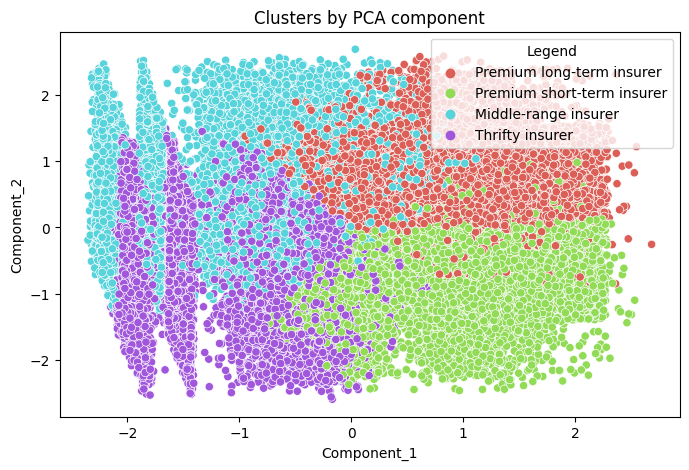

In [20]:
df_pca_kmeans['Legend'] = df_pca_kmeans['Segment_Kmeans_PCA'].map({0: 'Middle-range insurer',
                           1: 'Premium short-term insurer',
                           2: 'Thrifty insurer',
                           3: 'Premium long-term insurer'})
plt.figure(figsize=(8, 5))
sns.scatterplot(df_pca_kmeans, x = 'Component_1', y = 'Component_2', hue = 'Legend', palette = 'hls')
plt.title('Clusters by PCA component')
plt.show()

* Looking at the plot, we realize that the first component separates the customers based on annual premium price and their preference on Policy Sales Channel. Higher score means that a customer pays high annual premium and prefers to be outreached by lower Public Policy Channel code.
* The second component separates the customers based on the duration of their association with the company. Higher score means that a customer has been associated with the company for a longer period of time.

## 5. Demographic Cluster Analysis
___

### Subset demographic data

In [21]:
demographic = ['Gender', 'Region_Code', 'Age', 'Driving_License', 'Vehicle_Age_num', 'Vehicle_Damage']
demo_df = customer_df[demographic]
demo_std = df_std[demographic]
demo_std

,Gender,Region_Code,Age,Driving_License,Vehicle_Age_num,Vehicle_Damage
0,0.799164,0.102859,0.060231,0.029776,2.123928,0.147932
1,0.799164,0.102859,0.307817,0.029776,2.123928,0.147932
2,-1.251308,0.102859,1.050574,0.029776,0.120252,0.147932
3,-1.251308,0.691056,0.307817,0.029776,0.120252,0.147932
4,0.799164,-1.745763,-0.517469,0.029776,0.120252,0.147932
...,...,...,...,...,...,...
45150,0.799164,1.615367,-0.269883,0.029776,0.120252,0.147932
45151,-1.251308,0.102859,-0.187355,0.029776,0.120252,0.147932
45152,-1.251308,0.102859,0.225288,0.029776,0.120252,0.147932
45153,-1.251308,0.102859,1.463217,0.029776,0.120252,0.147932


### Principal Component Analysis

In [22]:
pca = PCA()
pca.fit(demo_std)

#cumulative sum of total variance
pca.explained_variance_ratio_.cumsum()

array([0.27173146, 0.44069828, 0.60698634, 0.76954837, 0.93000219,
       1.        ])

The first four components can explain about 77% of the total variance.

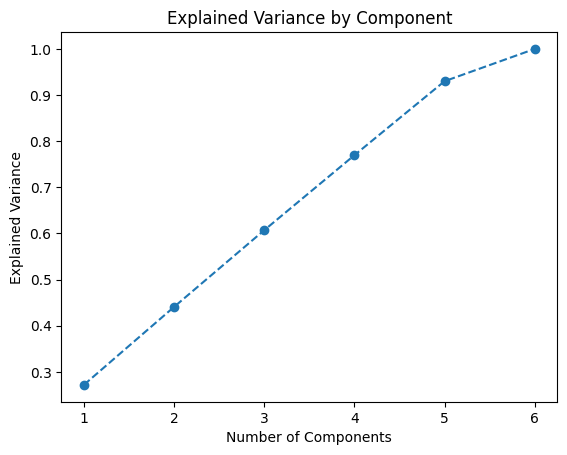

In [23]:
# explained variance by principal component
plt.plot(range(1, 7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Component')
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.show()

77% of the variance of the data is explained by 4 components. Let's keep the first 4 components for our analysis.

In [24]:
pca = PCA(n_components = 4)
pca.fit(demo_std)

PCA(n_components=4)

### Correlation Heatmap of Components Vs Original Features

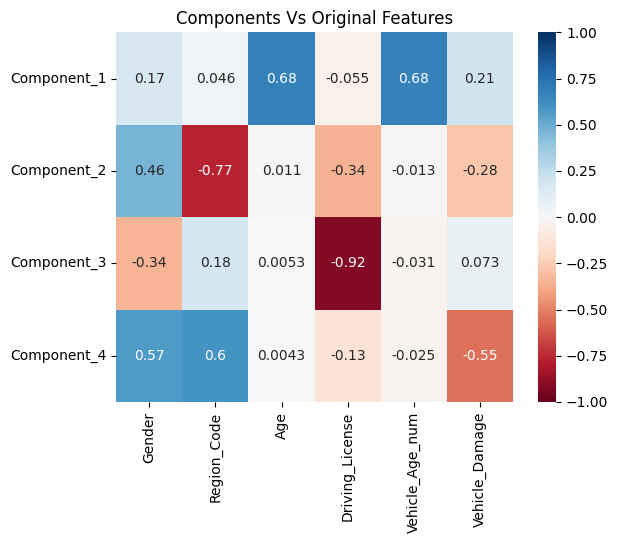

In [25]:
demo_pca_comp = pd.DataFrame(data = pca.components_, 
                           columns = demo_std.columns,
                           index = ['Component_1', 'Component_2', 'Component_3', 'Component_4'])
sns.heatmap(demo_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot = True)
plt.title('Components Vs Original Features')
plt.show()

* We see that there is a strong positive correlation between the first component and Age and Vehicle Age. It seems like the first component is a representation of a pattern where older age groups tend to own older vehicles. 
* For the second component, we see strong negative correlation with Region Code and moderate positive correlation with Gender. 
* For the third component, we see strong negative correlation with Driving License. The third component seems to represent customers who do not have driving license.
* For the final component, we realize that Gender and Region Code are the most important features. We observed that Vehicle Damage load negatively but are still important.  It seems like the final component is a representation of a pattern where customers in particular gender group and region are less likely to have damage on their vehicles.

In [26]:
demo_scores_pca = pca.transform(demo_std)

### Within Clusters Sum of Squares

In [27]:
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_init = 10)
    kmeans_pca.fit(demo_scores_pca)
    wcss.append(kmeans_pca.inertia_)

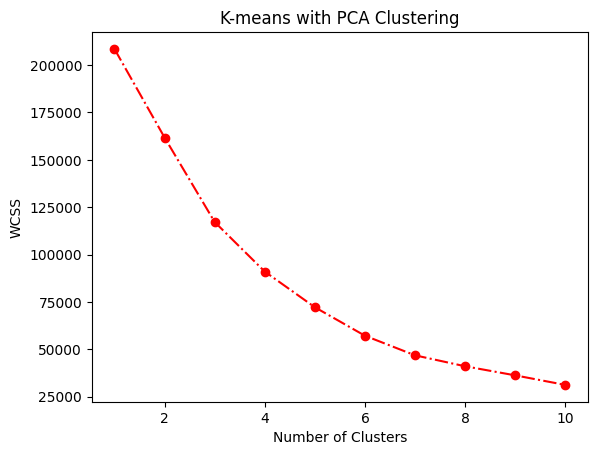

In [28]:
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.', color = 'red')
plt.title('K-means with PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

According to the elbow rule, the optimal number of clusters seems to be 7.

### Silhouette Score

In [ ]:
#for i in range(2,10):
#    kmeans_pca_sil = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_init = 10).fit(demo_scores_pca)
#    preds = kmeans_pca_sil.predict(demo_scores_pca)
#    silhouette_avg = silhouette_score(demo_scores_pca, preds)
#    
#    print('Silhouette Score for %i Clusters: %0.4f' % (i, silhouette_avg))

### K-Means Clustering with 7 Clusters

In [29]:
demo_kmeans_pca = KMeans(n_clusters = 7, init = 'k-means++', random_state = 0, n_init = 10).fit(demo_scores_pca)
demo_label_pca = demo_kmeans_pca.predict(demo_scores_pca)

In [30]:
df_pca_kmeans = pd.concat([customer_df[demographic + ['Annual_Premium'] + ['Policy_Sales_Channel']].reset_index(drop=True), pd.DataFrame(demo_scores_pca)], axis =1)
df_pca_kmeans.columns.values[-4:] = ['Component_1', 'Component_2', 'Component_3', 'Component_4']
df_pca_kmeans['Segment_KMeans_PCA'] = demo_label_pca

### Segment Profiling

In [31]:
demo_pca_kmeans_analysis = df_pca_kmeans.groupby(['Segment_KMeans_PCA']).mean()
demo_pca_kmeans_analysis['Total_Revenue'] = df_pca_kmeans[['Annual_Premium', 'Segment_KMeans_PCA']].groupby(['Segment_KMeans_PCA']).sum()
demo_pca_kmeans_analysis['No. Obs'] = df_pca_kmeans[['Segment_KMeans_PCA', 'Gender']].groupby(['Segment_KMeans_PCA']).count()
demo_pca_kmeans_analysis['Prop Obs'] = demo_pca_kmeans_analysis['No. Obs']/demo_pca_kmeans_analysis['No. Obs'].sum()
demo_pca_kmeans_analysis

,Gender,Region_Code,Age,Driving_License,Vehicle_Age_num,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Component_1,Component_2,Component_3,Component_4,Total_Revenue,No. Obs,Prop Obs
Segment_KMeans_PCA,,,,,,,,,,,,,,,
0,0.537118,26.369824,26.433670,1.0,0.012498,1.000000,29073.817046,127.543593,-2.203594,-0.085010,0.078610,-0.150402,193079219,6641,0.147071
1,0.000000,31.614896,44.143668,1.0,1.035989,1.000000,30786.924750,81.977194,0.020477,-0.943197,0.478556,-0.555190,319937722,10392,0.230141
2,0.999928,32.771720,44.083989,1.0,0.999350,0.999928,30757.317253,82.477793,0.311395,-0.070400,-0.201017,0.667658,425896572,13847,0.306655
3,0.682865,8.905087,44.658694,1.0,1.037965,1.000000,25790.121741,89.646798,0.196071,1.170072,-0.345241,-0.905422,203793542,7902,0.174997
4,0.571429,25.687371,35.824017,1.0,0.601449,0.000000,23195.318841,116.386128,-2.316808,1.902997,-0.495038,3.613745,22406678,966,0.021393
5,0.675000,24.750000,58.575000,0.0,1.125000,1.000000,32062.275000,67.400000,2.989089,11.739477,30.789404,4.421172,1282491,40,0.000886
6,0.776598,28.962176,59.494131,1.0,1.663872,1.000000,35073.501770,60.478293,1.989661,-0.039630,-0.137320,0.188226,188239484,5367,0.118857


Based on the values of variables and component scores, I will label each of the seven segments as 'Young New Vehicle Owner', 'Mature Female Vehicle Owner', 'Mature Male Vehicle Owner', 'Lower Regionals', 'Non-Damaged Vehicle Owner', 'Elderly Vehicle Owner without Licenses' and 'Elderly Vehicle Owner'.

__0. Young New Vehicle Owner__
* This is the youngest segment with an average age of 27.
* They own the vehicles that are relatively the newest and have damage.

__1. Mature Female Vehicle Owner__
* This segment is comprised entirely of women with an average age of 44. 
* They pay high average annual premium price of 30787 dollars.

__2. Mature Male Vehicle Owner__ 
* This segment is comprised almost entirely of men with an average age of 44. 
* They pay high average annual premium price of 30757 dollars.

__3. Lower Regionals__
* This is the segment from region code 9 on average.

__4. Non-Damaged Vehicle Owner__ 
* This is a segment with an average age of 36 who does not have a damage on their vehicles. 
* It seems to be a segment of customers who have not yet experienced vehicle damage.
* They pay the smallest average annual premium price of 23195 dollars.

__5. Elderly Vehicle Owner without Licenses__
* This is an oldest segment with an average age of 59 who does not have driving license. 
* They own older vehicles compared to other clusters. 

__6. Elderly Vehicle Owner__
* This is an oldest segment with an average age of 59 who possesses driving license. 
* They own the oldest vehicles among other clusters. 
* They pay the highest average annual premium price of 35073 dollars.

### Segment Analysis

In [32]:
demo_pca_kmeans_analysis.rename({0:'Young New Vehicle Owner',
                                1: 'Mature Female Vehicle Owner',
                                2: 'Mature Male Vehicle Owner',
                                3: 'Lower Regionals',
                                4: 'Non-Damaged Vehicle Owner',
                                5: 'Elderly Vehicle Owner without Licenses',
                                6: 'Elderly Vehicle Owner'})

,Gender,Region_Code,Age,Driving_License,Vehicle_Age_num,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Component_1,Component_2,Component_3,Component_4,Total_Revenue,No. Obs,Prop Obs
Segment_KMeans_PCA,,,,,,,,,,,,,,,
Young New Vehicle Owner,0.537118,26.369824,26.433670,1.0,0.012498,1.000000,29073.817046,127.543593,-2.203594,-0.085010,0.078610,-0.150402,193079219,6641,0.147071
Mature Female Vehicle Owner,0.000000,31.614896,44.143668,1.0,1.035989,1.000000,30786.924750,81.977194,0.020477,-0.943197,0.478556,-0.555190,319937722,10392,0.230141
Mature Male Vehicle Owner,0.999928,32.771720,44.083989,1.0,0.999350,0.999928,30757.317253,82.477793,0.311395,-0.070400,-0.201017,0.667658,425896572,13847,0.306655
Lower Regionals,0.682865,8.905087,44.658694,1.0,1.037965,1.000000,25790.121741,89.646798,0.196071,1.170072,-0.345241,-0.905422,203793542,7902,0.174997
Non-Damaged Vehicle Owner,0.571429,25.687371,35.824017,1.0,0.601449,0.000000,23195.318841,116.386128,-2.316808,1.902997,-0.495038,3.613745,22406678,966,0.021393
Elderly Vehicle Owner without Licenses,0.675000,24.750000,58.575000,0.0,1.125000,1.000000,32062.275000,67.400000,2.989089,11.739477,30.789404,4.421172,1282491,40,0.000886
Elderly Vehicle Owner,0.776598,28.962176,59.494131,1.0,1.663872,1.000000,35073.501770,60.478293,1.989661,-0.039630,-0.137320,0.188226,188239484,5367,0.118857


Here are several factors and metrics to evaluate each customer segment in terms of revenue potential, loyalty and growth opportunity.

__1. Total Revenue__
* Mature Male Vehicle Owner is the segment with the highest revenue potential (425,896,572 dollars). 
* The segment with the second highest revenue potential is Mature Female Vehicle Owner (319,937,722 dollars).

__2. Customer Life Time Value__
* Elderly Vehicle Owner is the segment with the highest CLV in terms of the average annual premium spend per customer (35,073 dollars).

__3. Market Size__
* Mature Male Vehicle Owner is the segment with the largest market size (30.7%).
* The segment with the second largest market size is Mature Female Vehicle Owner (23%).

__5. Policy Sales Channel preference__
* Insurers in older groups tend to prefer to be outreached by lower Policy Sales Channel code. 
* Elderly Vehicle Owner and Elderly Vehicle Owner without License prefer 60 and 67 on average, while Young New Vehicle Owner, the youngest segment, prefer the code 127 on average.

### Visualization of Demographic Clusters by PCA Components

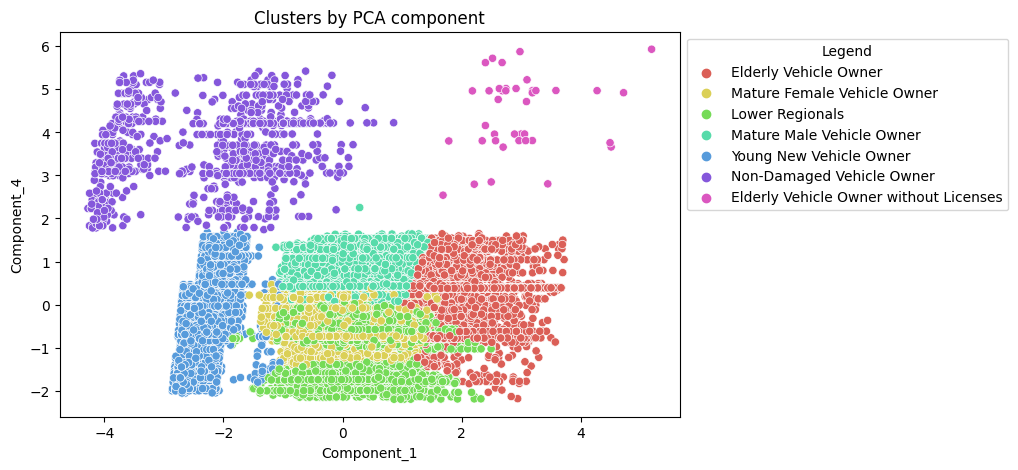

In [33]:
df_pca_kmeans['Legend'] = df_pca_kmeans['Segment_KMeans_PCA'].map({0:'Young New Vehicle Owner',
                                1: 'Mature Female Vehicle Owner',
                                2: 'Mature Male Vehicle Owner',
                                3: 'Lower Regionals',
                                4: 'Non-Damaged Vehicle Owner',
                                5: 'Elderly Vehicle Owner without Licenses',
                                6: 'Elderly Vehicle Owner'})

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(df_pca_kmeans, x = 'Component_1', y = 'Component_4', hue = 'Legend', palette = 'hls')
plt.title('Clusters by PCA component')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

* Looking at the plot, we realize that the first component separates the customers well into age groups. High scores mean that they are in older age group and own older vehicle.
* The fourth component separates the customers into two big groups. 'Non-Damaged Vehicle Owner' and 'Elderly Vehicle Owner without Licenses' both have higher score compared to the rest and seem to be the group that is less likely to have damage in their vehicles.

## 6. Business Questions
___

### Q1. Can we identify distinct customer segments based on particular variables? What are the key characteristics of each customer segment?

For the business cluster, we identified 4 customer segments based on Annual Premium, Policy Sales Channel and Vintage: 
* Thrifty insurer: low price of average annual premium
* Middle-range insurer: medium price of average annual premium
* Premium short-term insurer: high price of average annual premium, short duration of customer association
* Premium long-term insurer: high price of average annual premium, long duration of customer association

For the demographic cluster, we identified 7 customer segments based on Age, Gender, Region Code, Driving License and Vehicle Age: 
* Young New Vehicle Owner: the youngest segment, relatively the newest vehicle, low price of average annual premium
* Mature Female Vehicle Owner: females in 40-50 age range, high price of average annual premium
* Mature Male Vehicle Owner: males in 40-50 age range, high price of average annual premium
* Lower Regionals: segment from lower region code, average age of 44
* Non-Damaged Vehicle Owner: segment with non-damaged vehicles, average age of 35, low price of average annual premium
* Elderly Vehicle Owner without Licenses: the olderst segment without driving license, highest price of average annual premium
* Elderly Vehicle Owner: the olderst segment, highest price of average annual premium

### Q2. Which segments are most valuable to the company in terms of revenue potential, loyalty, or growth opportunities?

Understanding the most valuable segment can help in allocating resources and designing targeted marketing strategies.

* From the business cluster, 'Premium long-term insurer' seems to be the most valuable segment to the company in terms of revenue potential and loyalty. 'Premium long-term insurer' is a segment with the largest total revenue of 470,191,165 dollars and the longest average duration of 234 days, suggesting a higher level of loyalty or retention among these customers.

* From the demographic cluster, 'Mature Male Vehicle Owner' seems to be the most valuable segment to the company. 'Mature Male Vehicle Owner' emerges as the segment with the highest revenue potential of 425,896,572 dollars and has the largest market size which present greater growth opportunities due to their size and potential for expansion

### Q3. Do different segments prefer different communication channels?

Understanding preferred communication channels can optimize marketing spend and improve campaign effectiveness.

* There is a tendency that insurers who pay higher annual premium and are in older age groups prefer to be outreached by lower Policy Sales Channel code. 

* 'Premium long-term insurer' and 'Premium short-term insurer' from business cluster and 'Elderly Vehicle Owner' and 'Elderly Vehicle Owner without License' from demographic cluster prefer the channel code around between 60 and 70 on average.

* 'Thrifty insurer' from business cluster and 'Young New Vehicle Owner', the youngest segment from the demographic cluster, prefer the code greater than 120 on average.

### Q4. Are there differences in duration of a customer's association with the company across segments?

Yes, there are differences in the duration of a customer's association with the company across segments.

* 'Premium short-term insurer' has the shortest duration of association with the company, with an average of 77 days. Despite paying the highest price of average annual premium, customers in this segment are relatively new to the company, indicating a recent acquisition of customers who opt for higher-priced insurance plans.

* In contrast, 'Premium long-term insurer' has the longest duration of association with the company, with an average of 234 days. Despite also paying a high price of average annual premium, customers in this segment have been with the company for a significantly longer period, suggesting a higher level of loyalty or retention among these customers.

* Overall, the differences in the duration of association with the company across segments suggest varying levels of customer loyalty. Understanding these differences can inform customer relationship management strategies, retention initiatives, and targeted marketing efforts aimed at maximizing customer lifetime value and fostering long-term relationships with the company.

### Q5. What are the age distribution? Are there the age-related trends and preferences?

The analysis highlights several age-related trends and preferences among the identified customer segments. 
* Customers in older age groups pay a high average annual premium price, suggesting a potential preference for comprehensive coverage and higher levels of insurance protection. 
* The largest age group is 40-50 age range (70% in total), contributing the most to total revenue potential (949,627,836 dollars in total). 
* Younger age groups in their 20s and 30s tend to have relatively newer vehicles and pay a lower average annual premium price than older age groups. 
* Elderly segments, both with and without licenses, spend the highest average annual premium per customer.

## 7. Conclusion
___

In conclusion, the customer segmentation analysis has provided valuable insights into the characteristics, behaviors, and preferences of health insurance customers interested in vehicle insurance. By leveraging PCA and k-means clustering algorithms, we identified distinct customer segments based on both business and demographic variables.

From the analysis, we have identified key customer segments such as 'Premium long-term insurer' from the business cluster and 'Mature Male Vehicle Owner' from the demographic cluster, which demonstrate high revenue potential, market size, and growth opportunities. Understanding the Policy Sales Channel preferences of each segment can optimize marketing strategies and improve campaign effectiveness.

Furthermore, differences in customer retention across segments highlight varying levels of loyalty and engagement. Strategies aimed at customer retention and relationship management should be tailored to the specific needs and preferences of each segment.

Overall, the age-related trends and preferences identified underscore the importance of understanding demographic dynamics in shaping customer behavior and preferences. By leveraging these insights, businesses can tailor their products, services, and marketing strategies to better meet the needs of different customer segments, ultimately driving customer satisfaction, loyalty, and revenue growth.